In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [172]:
df=pd.read_csv('netflix_titles.csv')

In [173]:
pd.set_option('display.max_columns',20) # Displays columns upto 20

In [174]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [175]:
df.columns=df.columns.str.title()   # Capitalise first letter of columns

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       8807 non-null   object
 1   Type          8807 non-null   object
 2   Title         8807 non-null   object
 3   Director      6173 non-null   object
 4   Cast          7982 non-null   object
 5   Country       7976 non-null   object
 6   Date_Added    8797 non-null   object
 7   Release_Year  8807 non-null   int64 
 8   Rating        8803 non-null   object
 9   Duration      8804 non-null   object
 10  Listed_In     8807 non-null   object
 11  Description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [177]:
df.isnull().sum()

Show_Id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_Added        10
Release_Year       0
Rating             4
Duration           3
Listed_In          0
Description        0
dtype: int64

In [178]:
df.dropna(axis='index',how='any',subset=['Date_Added','Rating','Duration'],inplace=True)

In [179]:
df.isnull().sum()

Show_Id            0
Type               0
Title              0
Director        2621
Cast             825
Country          829
Date_Added         0
Release_Year       0
Rating             0
Duration           0
Listed_In          0
Description        0
dtype: int64

In [180]:
df.fillna('Unknown',inplace=True)
df

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Basic Visualisations

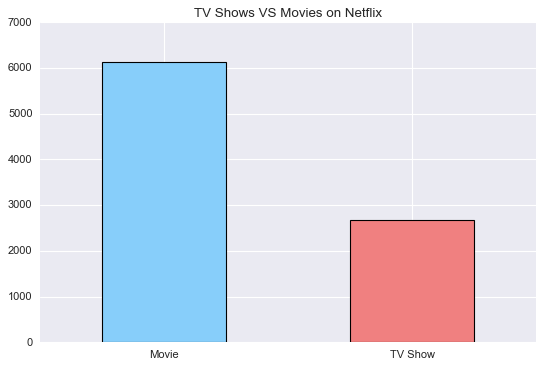

In [239]:
colors=['lightskyblue','lightcoral']
df['Type'].value_counts().plot(kind='bar',figsize=(8,5),rot=0,color=colors,edgecolor='black',linewidth=1)
plt.title('TV Shows VS Movies on Netflix')
plt.show()

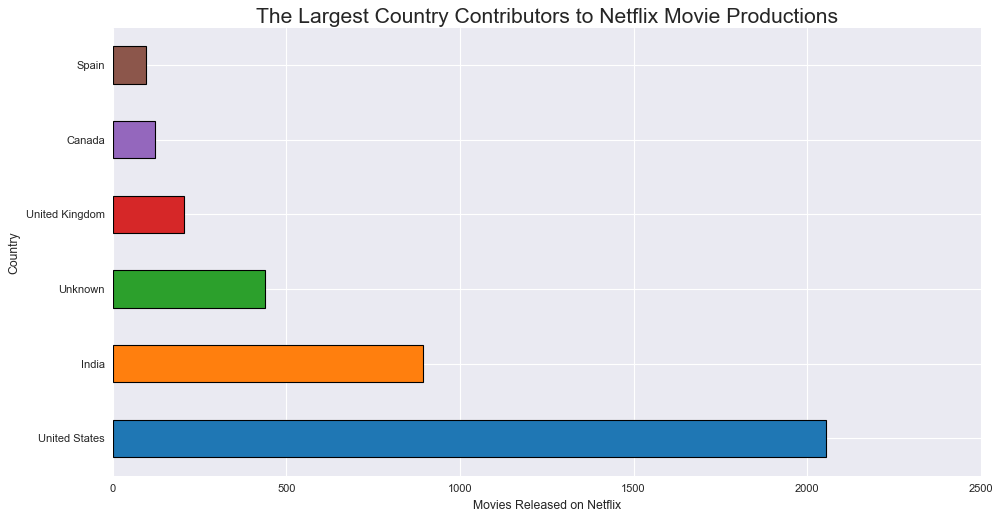

In [240]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
filtr=df['Type']=='Movie'
df.loc[filtr,'Country'].value_counts().head(6).plot(kind='barh',figsize=(14,7),color=colors,edgecolor='black',linewidth=1)
plt.title('The Largest Country Contributors to Netflix Movie Productions',fontsize=19)
plt.xlabel('Movies Released on Netflix')

plt.ylabel('Country')
plt.show()

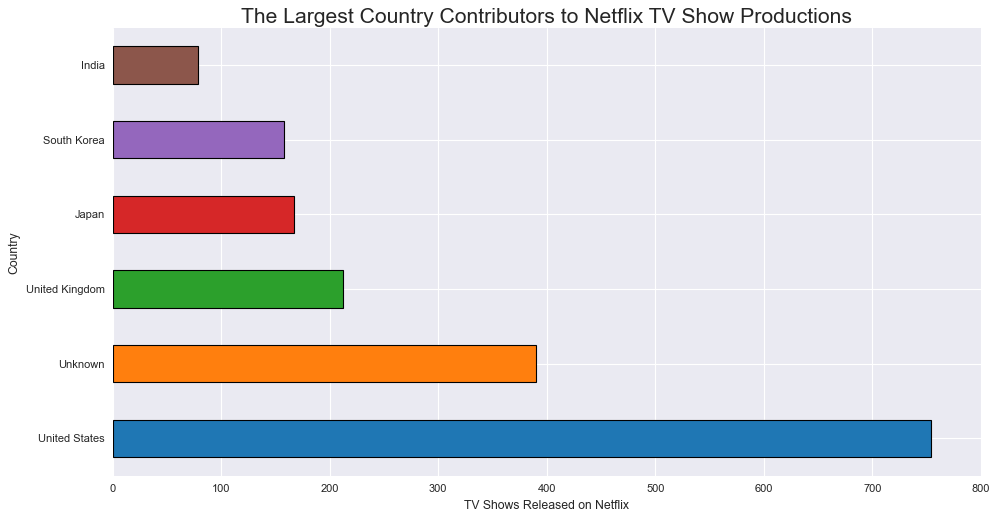

In [241]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
filtr=df['Type']=='TV Show'
df.loc[filtr,'Country'].value_counts().head(6).plot(kind='barh',figsize=(14,7),color=colors,edgecolor='black',linewidth=1)
plt.title('The Largest Country Contributors to Netflix TV Show Productions',fontsize=19)
plt.xlabel('TV Shows Released on Netflix')
plt.ylabel('Country')
plt.show()

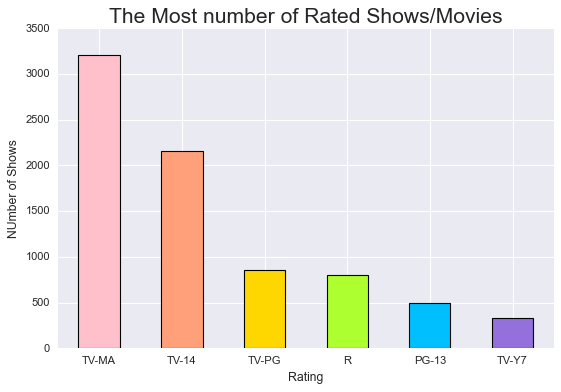

In [244]:
colors = ['#FFC0CB', '#FFA07A', '#FFD700', '#ADFF2F', '#00BFFF', '#9370DB', '#FF00FF']
df['Rating'].value_counts().head(6).plot(kind='bar',figsize=(8,5),color=colors,edgecolor='black',linewidth=1,rot=0)
plt.title('The Most number of Rated Shows/Movies',fontsize=19)
plt.xlabel('Rating')
plt.ylabel('NUmber of Shows')
plt.show()

# DATE

In [184]:
df['Date_Added']=pd.to_datetime(df['Date_Added'])

In [185]:
df.head()

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [186]:
df['Day']=df['Date_Added'].dt.day_name()

In [187]:
df['Date_Added'].min() #2008
#Earliest Realease Date

Timestamp('2008-01-01 00:00:00')

In [188]:
df['Date_Added'].max() #2021
#Latest Realease Date

Timestamp('2021-09-25 00:00:00')

In [189]:
df['Year_Added']=df['Date_Added'].dt.strftime('%Y') # Splitting Year from Date Added

In [190]:
Type_grp= df.groupby(['Type'])

In [191]:
Type_grp['Year_Added'].value_counts()

Type     Year_Added
Movie    2019          1424
         2020          1284
         2018          1237
         2021           993
         2017           836
         2016           251
         2015            56
         2014            19
         2011            13
         2013             6
         2012             3
         2009             2
         2008             1
         2010             1
TV Show  2020           595
         2019           592
         2021           505
         2018           411
         2017           349
         2016           175
         2015            26
         2013             5
         2014             5
         2008             1
Name: Year_Added, dtype: int64

In [192]:
df_train=pd.DataFrame(Type_grp["Year_Added"].value_counts())

In [193]:
df_train.rename(columns={'Year_Added':'Values'},inplace=True)

In [194]:
df_train.reset_index(inplace=True)

In [195]:
df_train

,Type,Year_Added,Values
0,Movie,2019,1424
1,Movie,2020,1284
2,Movie,2018,1237
3,Movie,2021,993
4,Movie,2017,836
5,Movie,2016,251
6,Movie,2015,56
7,Movie,2014,19
8,Movie,2011,13
9,Movie,2013,6


In [196]:
df_train.sort_values(by='Year_Added',ascending=True, inplace=True)

In [197]:
fil=df_train['Type']=='Movie'
fil_2=df_train['Type']=='TV Show'


<function matplotlib.pyplot.show(close=None, block=None)>

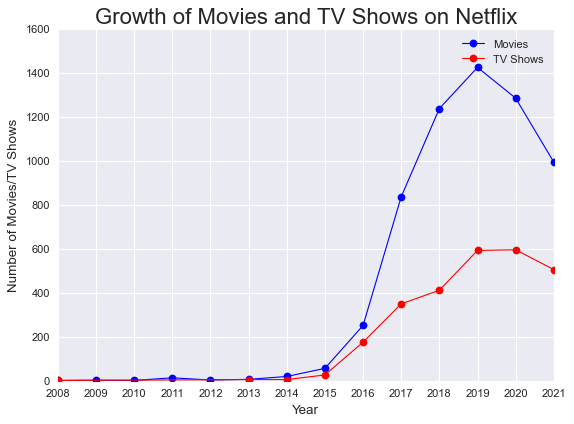

In [198]:
plt.style.use('seaborn')

plt.title("Growth of Movies and TV Shows on Netflix", fontsize=20)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Movies/TV Shows',fontsize=12)


plt.plot(df_train.loc[fil,'Year_Added'],df_train.loc[fil,'Values'],label='Movies',color="Blue",linewidth=1,marker='o',alpha=1)
plt.plot(df_train.loc[fil_2,'Year_Added'],df_train.loc[fil_2,'Values'],label='TV Shows',color='Red',linewidth=1,marker='o',alpha=1)
plt.legend()
plt.show

In [199]:
df['Difference_in_years']=df['Year_Added'].astype(float)-df['Release_Year']

In [200]:
df['Difference_in_years'].mean()  # Mean time period between TvShow/Movie release and upload on netflix (years)

4.690443686006826

# DURATION ANALYSIS

In [201]:
df['Duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [202]:
filtr=df['Duration'].str.contains('Seasons' and 'Season')
df['Seasons']=df.loc[filtr,'Duration']

In [203]:
df['Seasons'].fillna('1 Season',inplace=True)  # Considering all Movies are Show with 1 Season

In [204]:
df

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description,Day,Year_Added,Difference_in_years,Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,1.0,1 Season
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,0.0,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,0.0,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,0.0,1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,0.0,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Wednesday,2019,12.0,1 Season
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Monday,2019,1.0,2 Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Friday,2019,10.0,1 Season
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Saturday,2020,14.0,1 Season


In [205]:
df[['Season','Trash']]=df['Seasons'].str.split(' ',expand=True)

In [206]:
df.drop(columns=['Seasons','Trash'],inplace=True)

In [207]:
df['Season']=df['Season'].astype(int)

In [208]:
Y=df['Season'].nlargest(8)

In [209]:
filtr=df['Season']>=11
X=df.loc[filtr,'Title']

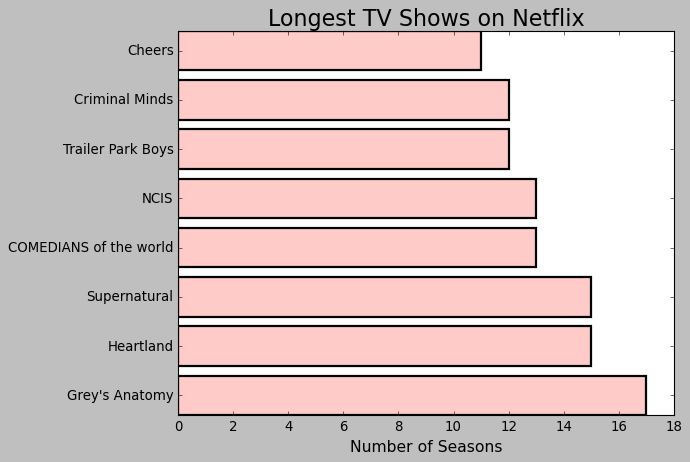

In [210]:
plt.style.use('classic')
fig = plt.figure(figsize=(8, 6))

plt.barh(X,Y,edgecolor='black',color='#ffcbc8',linewidth=2)
plt.title('Longest TV Shows on Netflix',fontsize=20)
plt.xlabel('Number of Seasons',fontsize=14)

plt.show()

In [211]:
filtr=df['Type']=='TV Show'
df.loc[filtr,'Season'].mean()  # Average Durartion of a TV show on Netflix

1.7518768768768769

In [212]:
filtr=df['Duration'].str.contains('min')
df['Dur']=df.loc[filtr,'Duration']

In [213]:
df['Dur'].fillna(0,inplace=True)

In [214]:
df[['Duration_in_minutes','Min']]=df['Dur'].str.split(' ',expand=True)

In [215]:
df.drop(columns=['Min','Duration','Dur'],inplace=True)

In [216]:
df['Duration_in_minutes'].fillna(0,inplace=True)

In [217]:
df['Duration_in_minutes']=df['Duration_in_minutes'].astype(int)


In [218]:
df.rename(columns={'Duration_in_minutes':'Duration_of_Movies'},inplace=True)

In [219]:
Y=df['Duration_of_Movies'].nlargest(10)

In [220]:
filtr=df['Duration_of_Movies']>=214
X=df.loc[filtr,'Title']

In [221]:
filtr=df['Type']=='Movie'
df.loc[filtr,'Duration_of_Movies'].mean()  # Average Run Time of a Movie in minutes

99.58488410055502

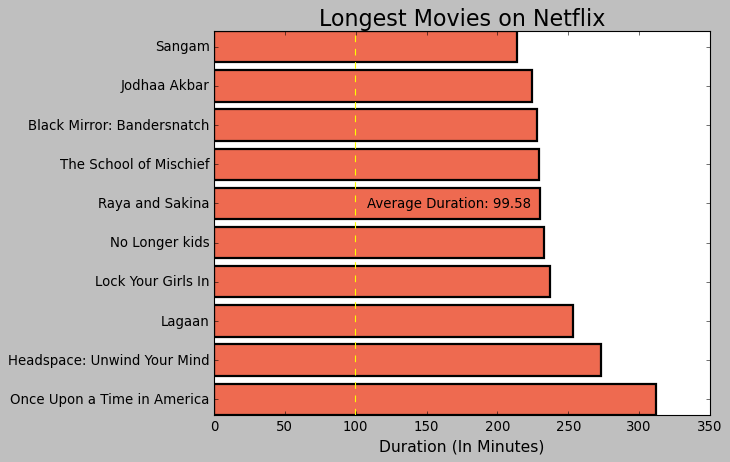

In [222]:
mean_value=df.loc[filtr,'Duration_of_Movies'].mean()  # Average Run Time of a Movie in minutes
fig = plt.figure(figsize=(8, 6))

plt.barh(X,Y,edgecolor='black',color='#ee6a50',linewidth=2)
plt.title('Longest Movies on Netflix',fontsize=20)
plt.xlabel('Duration (In Minutes)',fontsize=14)

plt.axvline(mean_value, color='yellow', linestyle='--', linewidth=1)
plt.annotate(f'Average Duration: {mean_value:.2f}', xy=(mean_value, len(labels)-1), 
            xytext=(mean_value+8, len(labels)-2.1), 
            )
plt.show()


# DAY ANALYSIS

In [223]:
df['Day'].value_counts()

Friday       2497
Thursday     1393
Wednesday    1287
Tuesday      1196
Monday        850
Saturday      816
Sunday        751
Name: Day, dtype: int64

In [224]:
filtr=df['Type']=='Movie'
df.loc[filtr,'Day'].value_counts()

Friday       1565
Thursday     1052
Wednesday     905
Tuesday       851
Monday        627
Sunday        569
Saturday      557
Name: Day, dtype: int64

In [225]:
df_Day=pd.DataFrame(df.loc[filtr,'Day'].value_counts(normalize=True))
df_Day.reset_index(inplace=True)

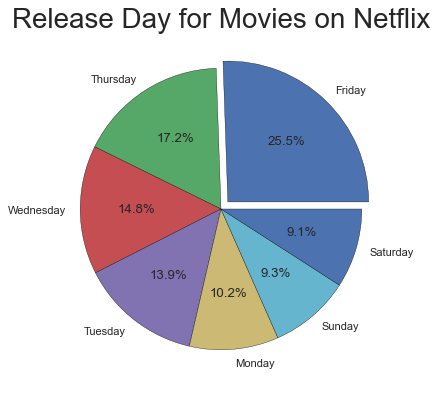

In [226]:
plt.style.use('seaborn')
slices=df_Day['Day']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
labels=df_Day['index']
plt.title("Release Day for Movies on Netflix",fontsize=25)
plt.rcParams["figure.figsize"] = (40,6)
plt.pie(slices,labels=labels,explode=[.07,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.show()

In [227]:
filtr_2=df['Type']=='TV Show' 
df.loc[filtr_2,'Day'].value_counts()

Friday       932
Wednesday    382
Tuesday      345
Thursday     341
Saturday     259
Monday       223
Sunday       182
Name: Day, dtype: int64

In [229]:
df_Day_2=pd.DataFrame(df.loc[filtr_2,'Day'].value_counts(normalize=True))
df_Day_2.reset_index(inplace=True)

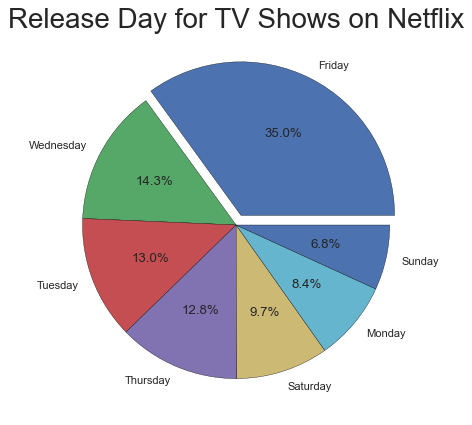

In [232]:
slices=df_Day_2['Day']
labels=df_Day_2['index']
plt.title("Release Day for TV Shows on Netflix",fontsize=25)
plt.rcParams["figure.figsize"] = (40,6)
plt.pie(slices,labels=labels,explode=[.07,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.show()

# Directors and Actors

In [280]:
df['Director'].value_counts().nlargest(10)

Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: Director, dtype: int64

In [281]:
filtr=df['Director']=='Rajiv Chilaka'
df.loc[filtr,'Description'].str.contains('Bheem')

# Rajiv Chilika is the Director of Several Movies of an Indian Cartoon 'Chota Bheem'

406     True
407     True
408     True
409     True
410     True
411     True
412     True
413     True
414     True
415     True
416     True
419     True
420     True
422     True
423     True
424     True
2717    True
6297    True
6645    True
Name: Description, dtype: bool

In [282]:
df[filtr]

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Listed_In,Description,Day,Year_Added,Difference_in_years,Season,Duration_of_Movies
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,Children & Family Movies,Things get spooky when Bheem and his buddies t...,Thursday,2021,8.0,1,64
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2009,TV-Y7,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,Thursday,2021,12.0,1,68
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2011,TV-Y7,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,Thursday,2021,10.0,1,67
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2010,TV-Y7,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,Thursday,2021,11.0,1,66
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,Children & Family Movies,When a stranger tries to steal an amulet from ...,Thursday,2021,8.0,1,64
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,Children & Family Movies,To save the kingdom of Valhalla from invasion ...,Thursday,2021,8.0,1,64
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ...",Thursday,2021,8.0,1,65
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,Children & Family Movies,After learning of a samurai village under thre...,Thursday,2021,8.0,1,64
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2012,TV-Y7,Children & Family Movies,When two evil entities kidnap a princess in a ...,Thursday,2021,9.0,1,68
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,Children & Family Movies,"Centuries after the end of a conqueror's rule,...",Thursday,2021,12.0,1,68


# Rajiv Chilika is the Director of 'Chhota Bheem movies', an Indian Cartoon.        Average Runtime of a movie is 67.8 Minutes

In [283]:
df

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Listed_In,Description,Day,Year_Added,Difference_in_years,Season,Duration_of_Movies
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,1.0,1,90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,0.0,2,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,0.0,1,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,0.0,1,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Wednesday,2019,12.0,1,158
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Monday,2019,1.0,2,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Friday,2019,10.0,1,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Saturday,2020,14.0,1,88
